# CHECKPOINT 1 - PROFESSOR ARNALDO JR

## Exercício 1 

In [1]:
#Dando imports necessários

import os 
import cv2
import matplotlib.pyplot as plt
import numpy as np

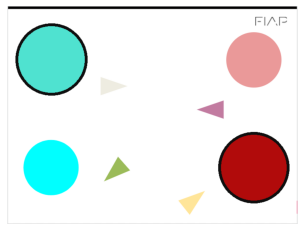

In [23]:
#Puxando imagem círculo PNG e Aplicando Filtro RGB na imagem

img =cv2.imread('circulo.png')

img2 = cv2.medianBlur(img, 1)

img_final = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img3 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

circulo = cv2.HoughCircles(img3, cv2.HOUGH_GRADIENT,1,20,param1=1, param2=20,minRadius=80, maxRadius=90)

imgcirculo = np.uint16(np.around(circulo))

for x in imgcirculo[0,:]:
    cv2.circle(img_final, (x[0],x[1]),x[2], (15,15,15),5)

plt.axis('off')

plt.imshow(img_final)


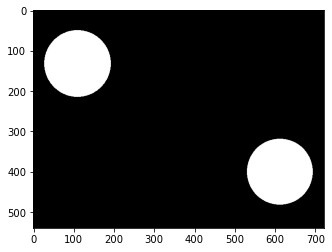

In [48]:
#ETAPA 2 

tamanho = 15
cor = (15, 15, 15)

imagem_hsv = cv2.cvtColor(img_final, cv2.COLOR_RGB2HSV)

hsv_minimo_circulo_1 = np.array([0, 232, 142])#minimo hsv do circulo vermelho

hsv_maximo_circulo_1 = np.array([0, 255, 255])#maximo hsv do circulo vermelho

hsv_minimo_circulo_2 = np.array([86, 163, 204]) #minimo hsv do circulo azul

hsv_maximo_circulo_2 = np.array([86, 255, 255]) #maximo hsv do circulo azul

mask_circulo_vermelho = (cv2.inRange(imagem_hsv, 
                                     hsv_minimo_circulo_1, 
                                     hsv_maximo_circulo_1)) 

mask_circulo_azul = (cv2.inRange(imagem_hsv, 
                                 hsv_minimo_circulo_2, 
                                 hsv_maximo_circulo_2))

imagemfinal = cv2.bitwise_or(mask_circulo_vermelho, mask_circulo_azul) #Aplicando as duas masks na mesma imagem

plt.imshow(imagemfinal, cmap='Greys_r', vmin=0, vmax=255)



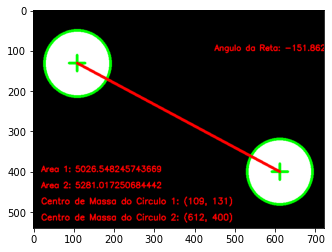

In [50]:
final_rgb = cv2.cvtColor(imagemfinal, cv2.COLOR_GRAY2RGB)

contornos, _ = cv2.findContours(imagemfinal, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

mascara_rgb = cv2.cvtColor(imagemfinal, cv2.COLOR_GRAY2RGB)

contornos_imagem =  mascara_rgb.copy()

cv2.drawContours(contornos_imagem, contornos, -1, [0,255,0], 5);

contorno1 = contornos[0] #Valores do Contorno 1 

M = cv2.moments(contorno1)

area = int(M['m00'])
coord_x = int(M['m10']/M['m00'])
coord_y = int(M['m01']/M['m00'])


tamanho = 20
cor = (0,255,0)

cv2.line(contornos_imagem,(coord_x - tamanho,coord_y),(coord_x + tamanho,coord_y),cor,5)
cv2.line(contornos_imagem,(coord_x,coord_y - tamanho),(coord_x, coord_y + tamanho),cor,5)

contorno2 = contornos[1] #Valores do Contorno 2

M2 = cv2.moments(contorno2)

area2 = int(M2['m00'])
coord_x_2 = int(M2['m10']/M2['m00'])
coord_y_2 = int(M2['m01']/M2['m00'])

cv2.line(contornos_imagem,(coord_x_2 - tamanho,coord_y_2),(coord_x_2 + tamanho,coord_y_2),cor,5)
cv2.line(contornos_imagem,(coord_x_2,coord_y_2 - tamanho),(coord_x_2, coord_y_2 + tamanho),cor,5)
cv2.line(contornos_imagem, (coord_x, coord_y), (coord_x_2, coord_y_2), (255,0,0), 5)

raio1 = int(np.sqrt(area / np.pi) / 2)
raio2 = int(np.sqrt(area2 / np.pi) / 2)

area_final_1 = (np.pi*raio1**2)
area_final_2 = (np.pi*raio2**2)

angulo = np.rad2deg(np.arctan2(coord_y_2 - coord_y, coord_x_2 - coord_x))

cv2.putText(contornos_imagem, f"Centro de Massa do Circulo 1: {coord_x_2, coord_y_2}", (20, 480), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)
cv2.putText(contornos_imagem, f"Centro de Massa do Circulo 2: {coord_x, coord_y}", (20, 520), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)
cv2.putText(contornos_imagem, f"Area 1: {area_final_1}", (20, 400), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255, 0, 0), 2)
cv2.putText(contornos_imagem, f"Area 2: {area_final_2}", (20, 440), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255, 0, 0), 2)
cv2.putText(contornos_imagem, f"Angulo da Reta: {angulo}", (450, 100), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255, 0, 0), 2)

plt.imshow(contornos_imagem)